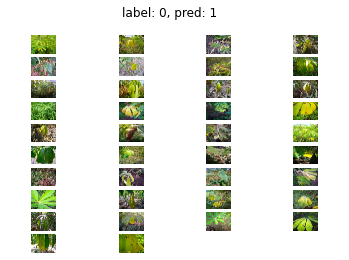

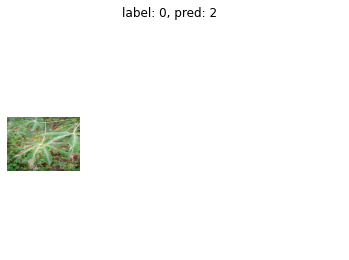

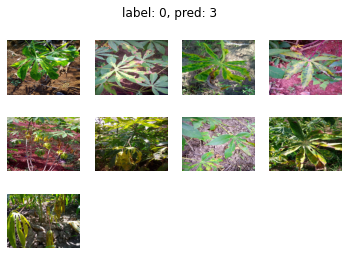

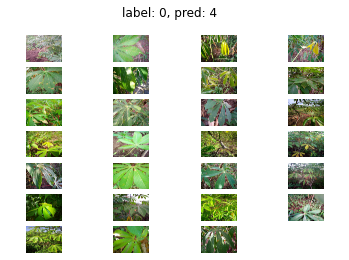

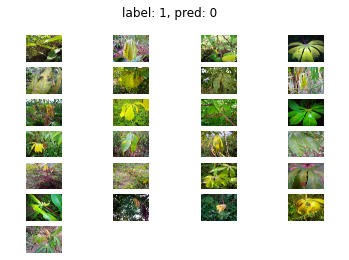

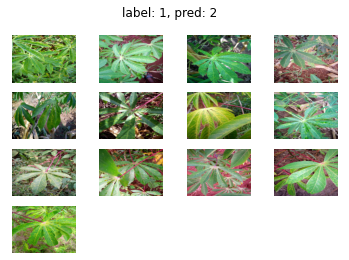

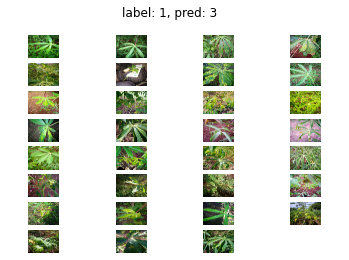

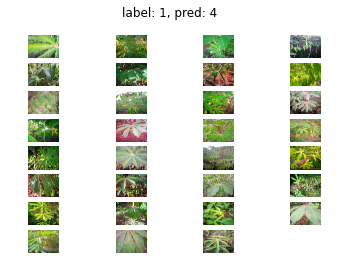

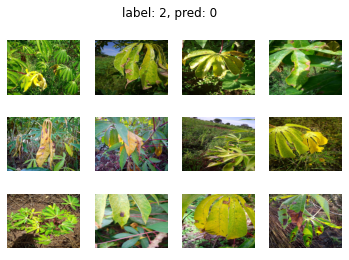

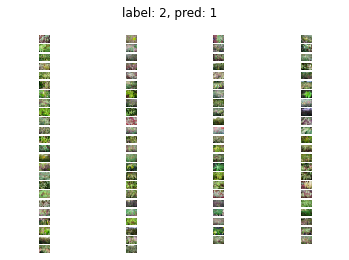

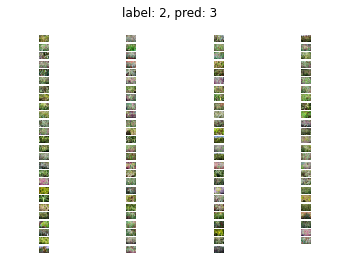

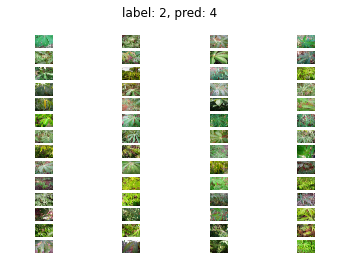

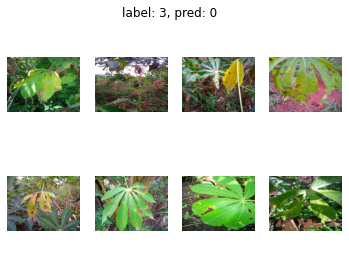

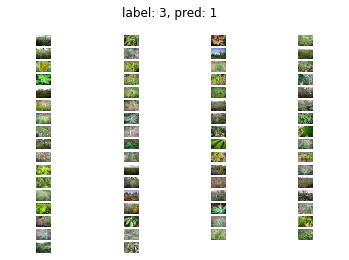

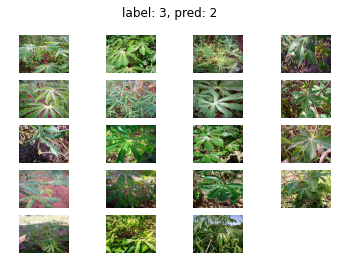

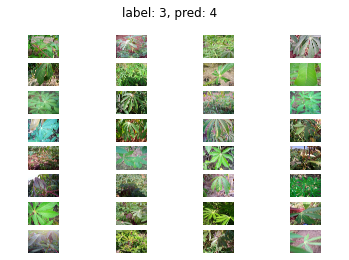

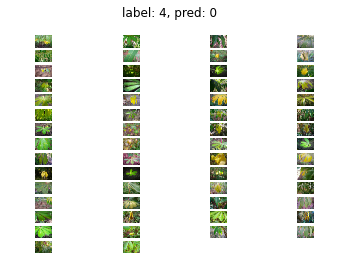

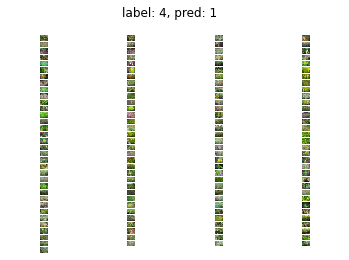

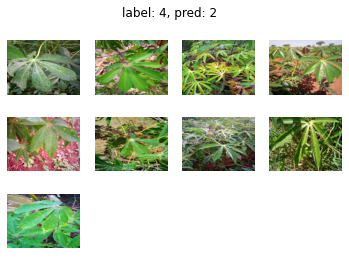

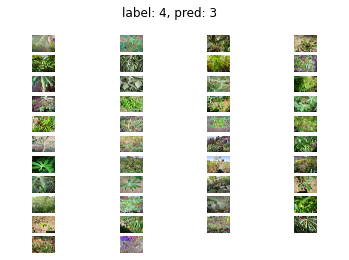

In [4]:
from haven import haven_utils as hu
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

datadir_base = '/home/xhdeng/scratch/datasets/cassava'
savedir_base = '/home/xhdeng/scratch/results/debug/cassava_debug'
df = pd.read_csv(os.path.join(savedir_base, 'bagging_val_result.csv'))

for label in range(5):
    for pred in range(5):
        if label == pred: 
            continue
        group = df.loc[(df['label'] == ('tensor(%s)' % label)) & (df[' pred'] == (' tensor(%s)' % pred)), [' fname']]
        fig = plt.figure()
        fig.suptitle("label: %s, pred: %s" % (label, pred))
        plt.axis('off')
        for index, fname in enumerate(group.values):
            img = mpimg.imread(os.path.join(datadir_base, 'train_images', fname[0].strip()))
            fig.add_subplot(math.ceil(group.size / 4), 4, index + 1)
            plt.imshow(img)
            plt.axis('off')

In [12]:
from haven import haven_utils as hu
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np

datadir_base = '/home/xhdeng/scratch/datasets/cassava'
savedir_base = '/home/xhdeng/scratch/results/debug/cassava_debug'


def get_confussion_matrix(fname):
    df = pd.read_csv(os.path.join(savedir_base, fname))
    labels = ['label%s' % l for l in range(5)]
    preds = ['pred%s' % p for p in range(5)]
    output = pd.DataFrame(index=labels, columns=preds+ ['correct/total'])
    correct_classified = 0
    total = 0
    for label in range(5):
        for pred in range(5):
            size = len(df.loc[(df['label'] == ('tensor(%s)' % label)) & (df[' pred'] == (' tensor(%s)' % pred))])
            output[preds[pred]][labels[label]] = size
        current_row = np.asarray(output.loc[labels[label]])[:-1]
        output['correct/total'][labels[label]] = current_row[label] / np.sum(current_row)
        correct_classified += current_row[label]
        total += np.sum(current_row)

#     print(total)
    print('acc: %s' % (correct_classified / total))
    print(output)

print('========== resnext+t3 ==========')
get_confussion_matrix('val_result.csv')

print('========== without data augmentation ==========')
get_confussion_matrix('ea04aa8bdf4d9306464f8db5d06505d4val_result.csv')

print('========== resnext+t1 ==========')
get_confussion_matrix('4b46b0cf6b73b2df96e57ebb2ee104faval_result.csv')

print('========== bagging ==========')
get_confussion_matrix('bagging_val_result.csv')

========== resnext+t3 ==========
4280
acc: 0.6901869158878504
       pred0 pred1 pred2 pred3 pred4 correct/total
label0    41   151     4     5    16       0.18894
label1     6   389    10    16    17      0.888128
label2     3   172   169    87    46      0.354298
label3     3   375    17  2190    47      0.832067
label4    12   297    10    32   165      0.319767
========== without data augmentation ==========
2680
acc: 0.8402985074626865
       pred0 pred1 pred2 pred3 pred4 correct/total
label0    81    15     3    10    38       0.55102
label1    14   159    13    35    41       0.60687
label2     7     5   182    60    49       0.60066
label3     4     7    11  1595    32      0.967253
label4    28    18     8    30   235      0.736677
========== resnext+t1 ==========
4280
acc: 0.8042056074766355
       pred0 pred1 pred2 pred3 pred4 correct/total
label0   120    21     3    27    46      0.552995
label1    37   288    21    69    23      0.657534
label2    14    24   214   160    